# Example script

This simple Jupyter Notebook will exemplify a simple workflow using this library, starting from data fusion and ending with prediction.

## Step zero: install the library (and get the example data)
Let's install the package from `PyPI`.

In [ ]:
%pip install chemfusekit

# Optional: download the example data from the repository (you could upload your own files)
!wget https://github.com/f-aguzzi/tesi/raw/main/tests/qepas.xlsx
!wget https://github.com/f-aguzzi/tesi/raw/main/tests/rt.xlsx

# Automatically inline the graphs
%matplotlib inline

## First step: Low-Level Data Fusion
- the `LLDF` class is used for data fusion
- the `LLDF_Settings` class is a helper class for setting up `LLDF`
- `LLDF` data can then be exported, or used for further processing

In [1]:
from chemfusekit.lldf import LLDFSettings, LLDF, Table, GraphMode

# Initialize the settings for low-level data fusion
# Perform preliminary data fusion
lldf_settings = LLDFSettings(output=GraphMode.NONE)
qepas_table = Table(
    file_path="tests/qepas.xlsx",
    sheet_name="Sheet1",
    preprocessing="snv"
)
rt_table = Table(
    file_path="tests/rt.xlsx",
    sheet_name="Sheet1",
    preprocessing="none"
)

tables = [qepas_table, rt_table]

# Initialize and run low-level data fusion
lldf = LLDF(tables, lldf_settings)
lldf.lldf()

In [ ]:
# (optional) export the LLDF data to an Excel file
lldf.export_data('output_file.xlsx')

## Second step: PCA

The `PCA` class provides Principal Component Analysis tools. Given:
- a target variance level to maintain even in the reduced component model;
- a confidence level for statistical tests;
- a number of initial components for the analysis
through the `PCASettings` class, the `PCA` class will perform an automated PCA analysis.

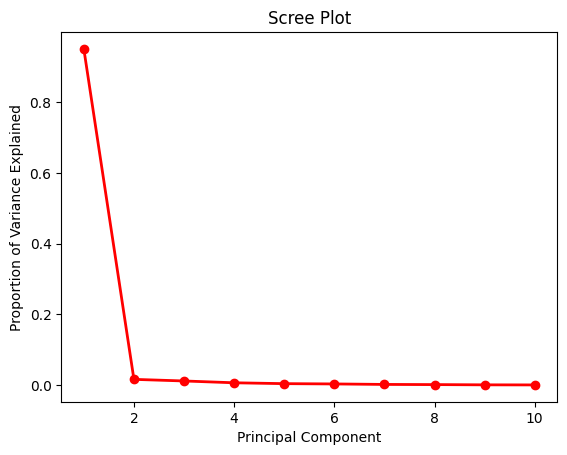

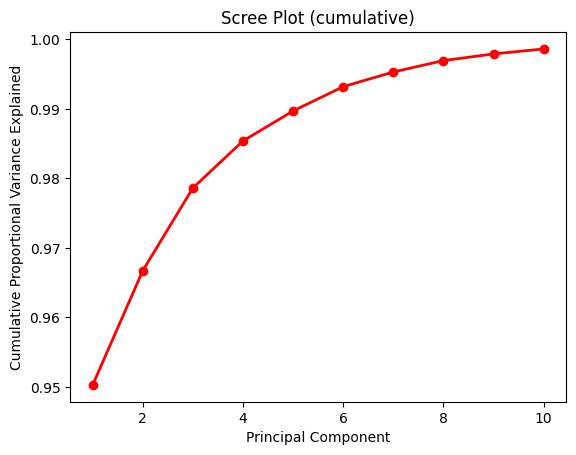


Number of components: 5



In [2]:
from chemfusekit.pca import PCASettings, PCA, GraphMode

# Initialize the settings for Principal Component Analysis
pca_settings = PCASettings(
    target_variance=0.99,
    confidence_level=0.05,
    initial_components=10,
    output=GraphMode.GRAPHIC    # graphs will be printed as pictures
)

# Initialize and run the PCA class
pca = PCA(lldf.fused_data, pca_settings)
pca.pca()

# Print the number of components and the statistics
print(f"\nNumber of components: {pca.components}\n")
pca.pca_stats()

## Third step: LR training

- the `LR` class provides Logistic Regression tools
- the `LRSettings` helper class holds the settings for the `LR` class

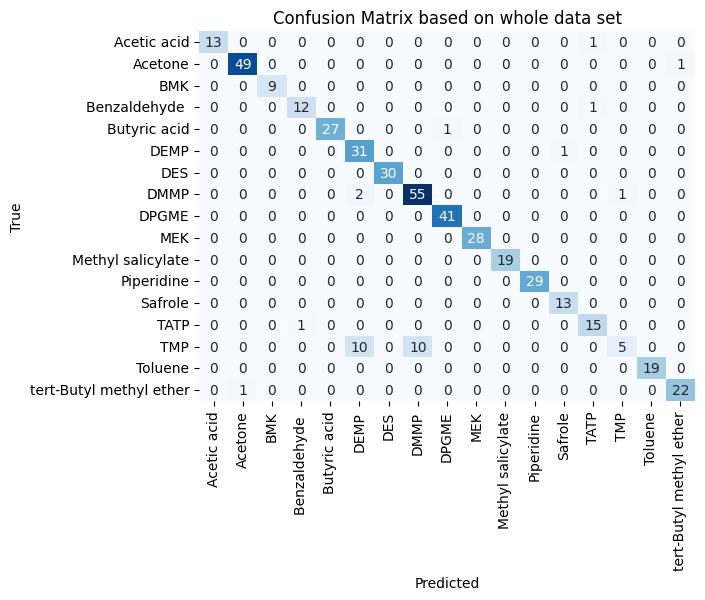

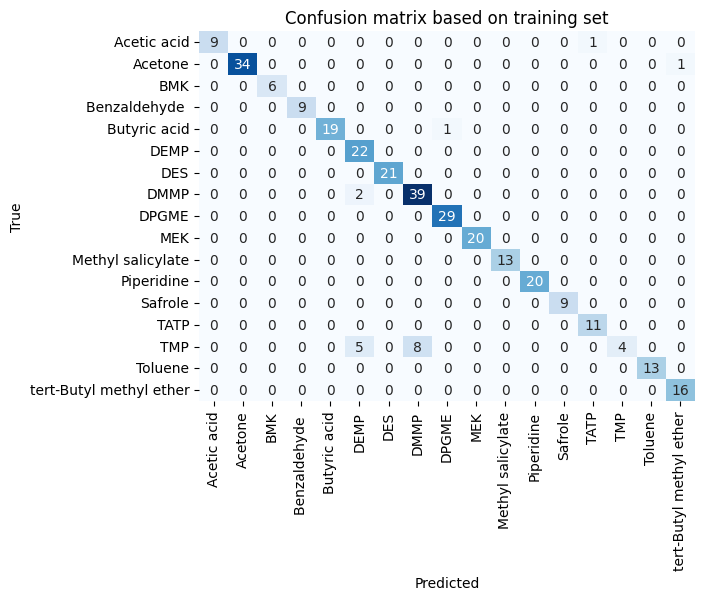

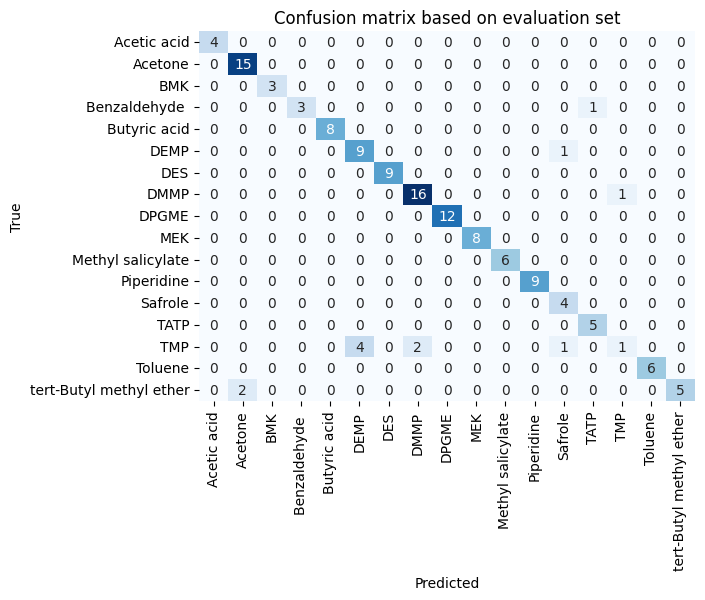

In [3]:
from chemfusekit.lr import LRSettings, LR, GraphMode

settings = LRSettings(
    algorithm='liblinear',
    output=GraphMode.GRAPHIC,   # graphs will be printed as pictures
    test_split=True # Run split test
)

# Initialize and run the LDA class
lr = LR(
    settings=settings,
    array_scores=pca.array_scores,  # use the data from PCA
    y=lldf.fused_data.y
)
lr.lr()

## Step 4: LR prediction

In [4]:
import pandas as pd

# Let's pick a random sample and see if it gets recognized correctly:
x_train = pd.DataFrame(lldf.fused_data.x_train)
x_data_sample = x_train.iloc[119] # should be DMMP
x_data_sample = x_data_sample.iloc[1:].to_frame().transpose()
x_data_sample = pca.pca_model.transform(x_data_sample)
x_data_sample = pd.DataFrame(x_data_sample)

# Let's run the prediction:
predictions = lr.predict(x_data_sample)
print(predictions)

['DMMP']
